# Test runs and Visualisations

This Notebook is used to provide a reproduceable test environment

*open this file with Jupyter-Lab

# Setup

In [1]:
import subprocess

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Host Setup

In [ ]:
var host_1_ip =
var host_2_ip =

# Peer to Peer tests

*We use tmux to access and monitor the individual test progress*

## Localhost

The output CSV files are at /results.

### Batch Put

*Make sure to '''chmod u+rx bc_p2p''' and all scipts*

In [12]:
import subprocess

hosts = 1
maxpeers = 4
runs = 10
network = "localhost"

#init
peers = 1 

while peers <= maxpeers :
    # Start localhost peers
    subprocess.call(["tmux", "kill-server"])
    subprocess.call(["sh", "xstarttmux.sh", str(peers)])
    
    subprocess.call(["./batchPUT.sh", str(hosts), str(peers), str(runs), network])
    
    df = pd.read_csv("results/timings" + str(hosts) +"host" + str(peers) + "peers_batch_put_" + network + ".csv", names=["Seconds","Nanoseconds"])
    # To milliseconds
    df[df.columns[1]] = df[df.columns[1]].apply(lambda x: x/1000000000)
    # Join collumns
    df[df.columns[0]] = df[df.columns[0]] + df[df.columns[1]] 
    del df[df.columns[1]] 
    df.to_csv("results/seconds" + str(hosts) + "host" + str(peers) +"peers_batch_put_" + network + ".csv")
    
    peers = peers +1


### Batch Get

In [69]:
import subprocess

hosts = 1
maxpeers = 10
runs = 10
network = "localhost"

#init
peers = 1 

while peers <= maxpeers :
    # Start localhost peers
    subprocess.call(["tmux", "kill-server"])
    subprocess.call(["sh", "xstarttmux.sh", str(peers)])
    
    subprocess.call(["./batchGET.sh", str(hosts), str(peers), str(runs), network])
    
    df = pd.read_csv("results/timings" + str(hosts) +"host" + str(peers) + "peers_batch_get_" + network + ".csv", names=["Seconds","Nanoseconds"])
    # To milliseconds
    df[df.columns[1]] = df[df.columns[1]].apply(lambda x: x/1000000000)
    # Join collumns
    df[df.columns[0]] = df[df.columns[0]] + df[df.columns[1]] 
    del df[df.columns[1]] 
    df.to_csv("results/seconds" + str(hosts) + "host" + str(peers) +"peers_batch_get_" + network + ".csv")
    
    peers = peers +1


## 1 Ethernet Host

### Batch Put

In [63]:
# import subprocess
import paramiko
import time

hosts = 1
maxpeers = 10
runs = 10
network = "ethernet"

#init
peers = 1 
ssh = paramiko.SSHClient()

while peers <= maxpeers :
    # Devide peers
    
    # Start network host peers
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy()) 
    ssh.connect("192.168.2.140", username="vldb", password="vldb123")
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("tmux kill-server")
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("mv /home/vldb/GIT/bc_p2p/evaluation/bc_p2p .")
    time.sleep(1)
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("sh /home/vldb/GIT/bc_p2p/evaluation/xstarttmux.sh "+ str(peers))
    
    # Start localhost peers
    subprocess.call(["tmux", "kill-server"])
    time.sleep(1)

    # Start batch
    subprocess.call(["./batchPUT.sh", str(hosts), str(peers), str(runs), network])
    
    df = pd.read_csv("results/timings" + str(hosts) +"host" + str(peers) + "peers_batch_put_" + network + ".csv", names=["Seconds","Nanoseconds"])
    # To milliseconds
    df[df.columns[1]] = df[df.columns[1]].apply(lambda x: x/1000000000)
    # Join collumns
    df[df.columns[0]] = df[df.columns[0]] + df[df.columns[1]] 
    del df[df.columns[1]] 
    df.to_csv("results/seconds" + str(hosts) + "host" + str(peers) +"peers_batch_put_" + network + ".csv")
    
    peers = peers +1
    
ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("tmux kill-server")
subprocess.call(["tmux", "kill-server"])


KeyboardInterrupt: 

### Batch GET

In [70]:
# import subprocess
import paramiko
import time

hosts = 1
maxpeers = 10
runs = 10
network = "ethernet"

#init
peers = 1 
ssh = paramiko.SSHClient()

while peers <= maxpeers :
    # Devide peers
    
    # Start network host peers
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy()) 
    ssh.connect("192.168.2.140", username="vldb", password="vldb123")
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("tmux kill-server")
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("mv /home/vldb/GIT/bc_p2p/evaluation/bc_p2p .")
    time.sleep(1)
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("sh /home/vldb/GIT/bc_p2p/evaluation/xstarttmux.sh "+ str(peers))
    
    # Start localhost peers
    subprocess.call(["tmux", "kill-server"])
    time.sleep(1)

    # Start batch
    subprocess.call(["./batchGET.sh", str(hosts), str(peers), str(runs), network])
    
    df = pd.read_csv("results/timings" + str(hosts) +"host" + str(peers) + "peers_batch_get_" + network + ".csv", names=["Seconds","Nanoseconds"])
    # To milliseconds
    df[df.columns[1]] = df[df.columns[1]].apply(lambda x: x/1000000000)
    # Join collumns
    df[df.columns[0]] = df[df.columns[0]] + df[df.columns[1]] 
    del df[df.columns[1]] 
    df.to_csv("results/seconds" + str(hosts) + "host" + str(peers) +"peers_batch_get_" + network + ".csv")
    
    peers = peers +1
    
ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("tmux kill-server")
subprocess.call(["tmux", "kill-server"])


1

## 1 Wifi Host 

#### Batch PUT

In [57]:
import subprocess
import paramiko
import time

hosts = 1
maxpeers = 10
runs = 10
network = "wifi"

#init
peers = 1 
ssh = paramiko.SSHClient()

while peers <= maxpeers :
    # Devide peers
    
    # Start network host peers
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy()) 
    ssh.connect("192.168.2.126", username="vldb", password="vldb123")
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("tmux kill-server")
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("mv /home/vldb/GIT/bc_p2p/evaluation/bc_p2p .")
    time.sleep(1)
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("sh /home/vldb/GIT/bc_p2p/evaluation/xstarttmux.sh "+ str(peers))
    
    # Start localhost peers
    subprocess.call(["tmux", "kill-server"])
    time.sleep(1)

    # Start batch
    subprocess.call(["./batchPUT.sh", str(hosts), str(peers), str(runs), network])
    
    df = pd.read_csv("results/timings" + str(hosts) +"host" + str(peers) + "peers_batch_put_" + network + ".csv", names=["Seconds","Nanoseconds"])
    # To milliseconds
    df[df.columns[1]] = df[df.columns[1]].apply(lambda x: x/1000000000)
    # Join collumns
    df[df.columns[0]] = df[df.columns[0]] + df[df.columns[1]] 
    del df[df.columns[1]] 
    df.to_csv("results/seconds" + str(hosts) + "host" + str(peers) +"peers_batch_put_" + network + ".csv")
    
    peers = peers +1
    
ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("tmux kill-server")
subprocess.call(["tmux", "kill-server"])


1

#### Batch GET

In [68]:
# import subprocess
import paramiko
import time

hosts = 1
maxpeers = 10
runs = 10
network = "wifi"

#init
peers = 1 
ssh = paramiko.SSHClient()

while peers <= maxpeers :
    # Devide peers
    
    # Start network host peers
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy()) 
    ssh.connect("192.168.2.126", username="vldb", password="vldb123")
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("tmux kill-server")
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("mv /home/vldb/GIT/bc_p2p/evaluation/bc_p2p .")
    time.sleep(1)
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("sh /home/vldb/GIT/bc_p2p/evaluation/xstarttmux.sh "+ str(peers))
    
    # Start localhost peers
    subprocess.call(["tmux", "kill-server"])
    time.sleep(1)

    # Start batch
    subprocess.call(["./batchGET.sh", str(hosts), str(peers), str(runs), network])
    
    df = pd.read_csv("results/timings" + str(hosts) +"host" + str(peers) + "peers_batch_get_" + network + ".csv", names=["Seconds","Nanoseconds"])
    # To milliseconds
    df[df.columns[1]] = df[df.columns[1]].apply(lambda x: x/1000000000)
    # Join collumns
    df[df.columns[0]] = df[df.columns[0]] + df[df.columns[1]] 
    del df[df.columns[1]] 
    df.to_csv("results/seconds" + str(hosts) + "host" + str(peers) +"peers_batch_get_" + network + ".csv")
    
    peers = peers +1
    
ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("tmux kill-server")
subprocess.call(["tmux", "kill-server"])


1

## 2 Ethernet Host

### Batch Put

In [53]:
import subprocess
import paramiko
import time

hosts = 2
maxpeers = 10
runs = 10
network = "localhost"

#init
peers = 1 
ssh = paramiko.SSHClient()

while peers <= maxpeers :
    # Devide peers
    net_host_peers = int(math.ceil(peers/hosts))
    local_host_peers = int(math.floor(peers/hosts))
    
    # Start network host peers
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy()) 
    ssh.connect("192.168.2.140", username="vldb", password="vldb123")
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("tmux kill-server")
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("mv /home/vldb/GIT/bc_p2p/evaluation/bc_p2p .")
    time.sleep(1)
    ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("sh /home/vldb/GIT/bc_p2p/evaluation/xstarttmux.sh "+ str(net_host_peers))
    
    # Start localhost peers
    subprocess.call(["tmux", "kill-server"])
    time.sleep(1)
    subprocess.call(["sh", "xstarttmux.sh", str(local_host_peers)])

    # Start batch
    subprocess.call(["./batchPUT.sh", str(hosts), str(peers), str(runs), network])
    
    df = pd.read_csv("results/timings" + str(hosts) +"host" + str(peers) + "peers_batch_put_" + network + ".csv", names=["Seconds","Nanoseconds"])
    # To milliseconds
    df[df.columns[1]] = df[df.columns[1]].apply(lambda x: x/1000000000)
    # Join collumns
    df[df.columns[0]] = df[df.columns[0]] + df[df.columns[1]] 
    del df[df.columns[1]] 
    df.to_csv("results/seconds" + str(hosts) + "host" + str(peers) +"peers_batch_put_" + network + ".csv")
    
    peers = peers +1
    
ssh_stdin, ssh_stdout, ssh_stderr = ssh.exec_command("tmux kill-server")
subprocess.call(["tmux", "kill-server"])


### Batch Get

# Visualization

In [194]:
import subprocess

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [199]:
# PUT
p01 = pd.read_csv('results/1Ethernet/PUT/seconds1host1peers_batch_put_ethernet.csv', index_col=[0], names=["1"])
p02 = pd.read_csv('results/1Ethernet/PUT/seconds1host2peers_batch_put_ethernet.csv', index_col=[0], names=["2"])
p03 = pd.read_csv('results/1Ethernet/PUT/seconds1host3peers_batch_put_ethernet.csv', index_col=[0], names=["3"])
p04 = pd.read_csv('results/1Ethernet/PUT/seconds1host4peers_batch_put_ethernet.csv', index_col=[0], names=["4"])
p05 = pd.read_csv('results/1Ethernet/PUT/seconds1host5peers_batch_put_ethernet.csv', index_col=[0], names=["5"])
p06 = pd.read_csv('results/1Ethernet/PUT/seconds1host6peers_batch_put_ethernet.csv', index_col=[0], names=["6"])
p07 = pd.read_csv('results/1Ethernet/PUT/seconds1host7peers_batch_put_ethernet.csv', index_col=[0], names=["7"])
p08 = pd.read_csv('results/1Ethernet/PUT/seconds1host8peers_batch_put_ethernet.csv', index_col=[0], names=["8"])
p09 = pd.read_csv('results/1Ethernet/PUT/seconds1host9peers_batch_put_ethernet.csv', index_col=[0], names=["9"])
p10 = pd.read_csv('results/1Ethernet/PUT/seconds1host10peers_batch_put_ethernet.csv', index_col=[0], names=["10"])


ethernet_put_df = pd.concat([p01, p02, p03, p04, p05, p06, p07, p08, p09, p10], axis=1, join='inner').sort_index()
ethernet_put_df.drop(ethernet_put_df.tail(1).index,inplace=True)
ethernet_put_df.reset_index()
ethernet_put_df = ethernet_put_df.astype(float)


# GET
df01 = pd.read_csv('results/1Ethernet/GET/seconds1host1peers_batch_get_ethernet.csv', index_col=[0], names=["1"])
df02 = pd.read_csv('results/1Ethernet/GET/seconds1host2peers_batch_get_ethernet.csv', index_col=[0], names=["2"])
df03 = pd.read_csv('results/1Ethernet/GET/seconds1host3peers_batch_get_ethernet.csv', index_col=[0], names=["3"])
df04 = pd.read_csv('results/1Ethernet/GET/seconds1host4peers_batch_get_ethernet.csv', index_col=[0], names=["4"])
df05 = pd.read_csv('results/1Ethernet/GET/seconds1host5peers_batch_get_ethernet.csv', index_col=[0], names=["5"])
df06 = pd.read_csv('results/1Ethernet/GET/seconds1host6peers_batch_get_ethernet.csv', index_col=[0], names=["6"])
df07 = pd.read_csv('results/1Ethernet/GET/seconds1host7peers_batch_get_ethernet.csv', index_col=[0], names=["7"])
df08 = pd.read_csv('results/1Ethernet/GET/seconds1host8peers_batch_get_ethernet.csv', index_col=[0], names=["8"])
df09 = pd.read_csv('results/1Ethernet/GET/seconds1host9peers_batch_get_ethernet.csv', index_col=[0], names=["9"])
df10 = pd.read_csv('results/1Ethernet/GET/seconds1host10peers_batch_get_ethernet.csv', index_col=[0], names=["10"])


ethernet_get_df = pd.concat([df01, df02, df03, df04, df05, df06, df07, df08, df09, df10], axis=1, join='inner').sort_index()
ethernet_get_df.drop(ethernet_get_df.tail(1).index,inplace=True)
ethernet_get_df.reset_index()
ethernet_get_df = ethernet_get_df.astype(float)


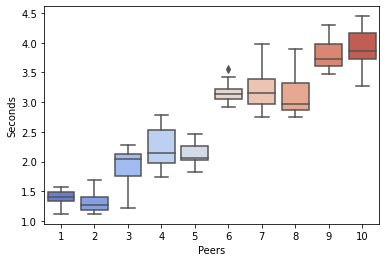

In [204]:
# PUT
ethernet_put_fig = sns.boxplot(data = ethernet_put_df, palette="coolwarm")
ethernet_put_fig.set(ylabel='Seconds', xlabel='Peers')

fig1 = ethernet_put_fig.get_figure()
fig1.savefig("ethernet_put_fig.png")

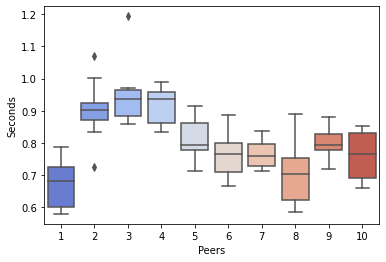

In [205]:
# GET
ethernet_get_fig = sns.boxplot(data = ethernet_get_df, palette="coolwarm")
ethernet_get_fig.set(ylabel='Seconds', xlabel='Peers')

fig2 = ethernet_get_fig.get_figure()
fig2.savefig("ethernet_get_fig.png")